In [17]:
# Step 1: Load the data and perform previous steps
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium 


df = pd.read_csv("MalariaAfricaDataset.csv")

#Determine percentage of missing values and number of blanks
total_rows = df.shape[0]
missing_percentages = df.isnull().sum() / total_rows * 100
number_of_blanks = df.isnull().sum()

print("Percentage of missing values:")
print(missing_percentages)

print("\nNumber of blanks:")
print(number_of_blanks)



Percentage of missing values:
Country Name                                                                                0.000000
Year                                                                                        0.000000
Country Code                                                                                0.000000
Incidence of malaria (per 1,000 population at risk)                                         7.407407
Malaria cases reported                                                                      7.407407
Use of insecticide-treated bed nets (% of under-5 population)                              77.777778
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    79.461279
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      82.154882
People using safely managed drinking water services (% of population)                      83.333333
People using safely managed drinking water services, rural (%

c:\Users\TrevorSimon\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Country Name,Year,Country Code,geometry,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),...,Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
0,Algeria,2007,DZA,POINT (28.033886 1.659626),0.010000,2.600000e+01,44.483090,-5.145760,7.785287,44.707722,...,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626
1,Angola,2007,AGO,POINT (-11.202692 17.873887),286.720000,1.533485e+06,18.000000,29.800000,1.500000,33.432854,...,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887
2,Benin,2007,BEN,POINT (9.307689999999999 2.315834),480.240000,0.000000e+00,40.028086,51.630414,18.850442,17.610266,...,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834
3,Botswana,2007,BWA,POINT (-22.328474 24.684866),1.030000,3.900000e+02,28.018806,-1.286076,11.377984,74.473112,...,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866
4,Burkina Faso,2007,BFA,POINT (12.238333 -1.561593),503.800000,4.424600e+04,35.332137,46.643990,13.879052,12.605150,...,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,POINT (8.619543 0.824782),278.200000,1.755577e+06,69.700000,31.100000,41.700000,29.137593,...,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782
590,Tunisia,2017,TUN,POINT (33.886917 9.537499),-62.451515,-7.251640e+06,18.106850,-14.501736,5.053485,92.660000,...,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499
591,Uganda,2017,UGA,POINT (1.373333 32.290275),336.760000,1.166783e+07,67.904532,58.047178,25.664802,7.070000,...,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275
592,Zambia,2017,ZMB,POINT (-13.133897 27.849332),160.050000,5.505639e+06,49.411761,32.285163,19.426755,40.232030,...,42.98,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332



Normalized DataFrame:


,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)"
0,0.460139,0.125561,0.130626,0.504190,0.691103,0.397377,0.195796,0.257073,0.150928
1,0.179894,0.498011,0.025168,0.387612,0.348099,0.332750,0.303195,0.175205,0.332554
2,0.412996,0.730678,0.316283,0.224012,0.087434,0.347019,0.341216,0.344055,0.332646
3,0.285913,0.166698,0.190906,0.811954,0.691595,0.678859,0.380676,0.239155,0.333806
4,0.363303,0.677533,0.232870,0.172261,0.139209,0.315405,0.282623,0.216509,0.418901
...,...,...,...,...,...,...,...,...,...
589,0.726984,0.511866,0.699664,0.343201,0.113573,0.512146,0.316964,0.288618,0.327918
590,0.181025,0.025846,0.084790,1.000000,0.316281,1.000000,1.000000,1.000000,1.000000
591,0.707984,0.799068,0.430617,0.115030,0.085068,0.276055,0.325954,0.301782,0.415507
592,0.512294,0.524498,0.325952,0.457913,0.315440,0.456332,0.298576,0.279951,0.285446


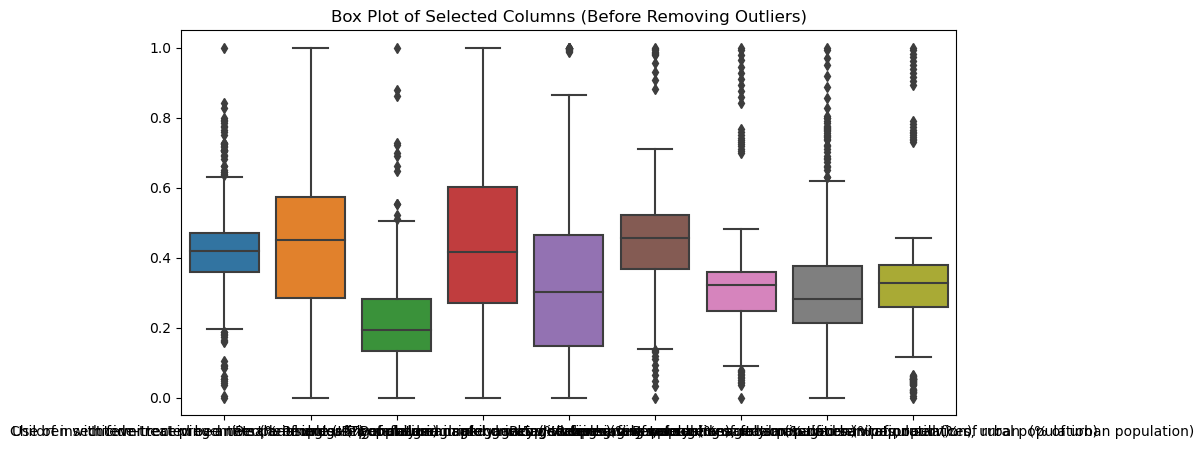

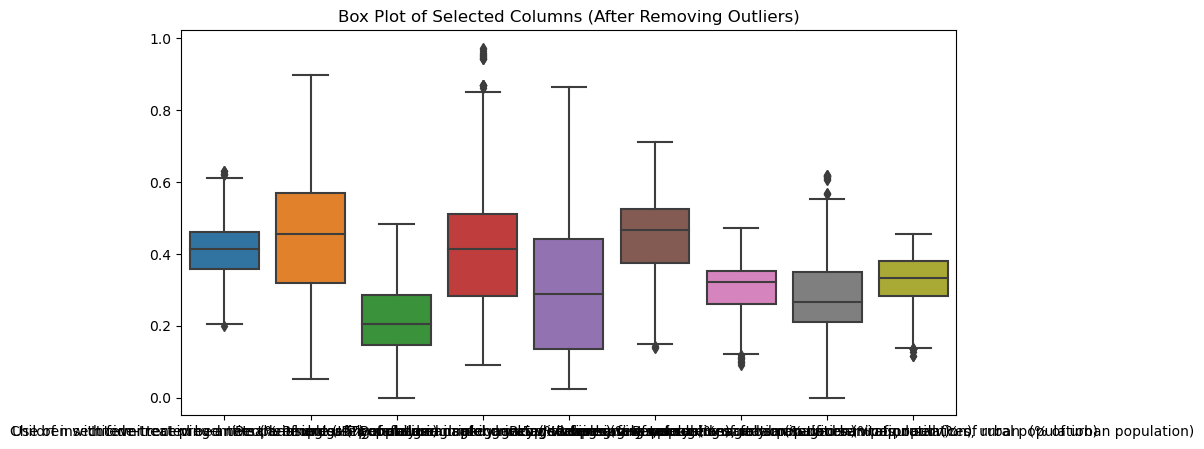

In [18]:
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv("MalariaAfricaDataset.csv")

# Extract columns of interest with high percentages of missing data
columns_of_interest = ["Use of insecticide-treated bed nets (% of under-5 population)",
                       "Children with fever receiving antimalarial drugs (% of children under age 5 with fever)",
                       "Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)",
                       "People using safely managed drinking water services (% of population)",
                       "People using safely managed drinking water services, rural (% of rural population)",
                       "People using safely managed drinking water services, urban (% of urban population)",
                       "People using safely managed sanitation services (% of population)",
                       "People using safely managed sanitation services, rural (% of rural population)",
                       "People using safely managed sanitation services, urban  (% of urban population)"]

# Prepare the data for multiple imputation (exclude non-numeric columns)
numeric_values = df.drop(["Country Name", "Year", "Country Code", "geometry"], axis=1)

# Perform multiple imputation using IterativeImputer
imputer = IterativeImputer()
imputed_values = imputer.fit_transform(numeric_values)

# Convert the imputed array back to a DataFrame
df_imputed = pd.DataFrame(imputed_values, columns=numeric_values.columns)

# Merge the imputed numeric values with the non-numeric columns
non_numeric = df[["Country Name", "Year", "Country Code", "geometry"]]
df_combined = pd.concat([non_numeric, df_imputed], axis=1)

# Display the DataFrame with missing values filled
display(df_combined)

# Normalize the selected columns using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_combined[columns_of_interest])

# Convert the normalized_data array back to a DataFrame with column names
normalized_df = pd.DataFrame(normalized_data, columns=columns_of_interest)

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
display(normalized_df)

# Create a box plot to identify outliers using IQR method
plt.figure(figsize=(10, 5))
sns.boxplot(data=normalized_df)
plt.title('Box Plot of Selected Columns (Before Removing Outliers)')
plt.show()

# Remove outliers using IQR (Interquartile Range) method
Q1 = normalized_df.quantile(0.25)
Q3 = normalized_df.quantile(0.75)
IQR = Q3 - Q1
outliers_removed = normalized_df[~((normalized_df < (Q1 - 1.5 * IQR)) | (normalized_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create a box plot after removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=outliers_removed)
plt.title('Box Plot of Selected Columns (After Removing Outliers)')
plt.show()


Study the counries with the highest number of malaria cases.

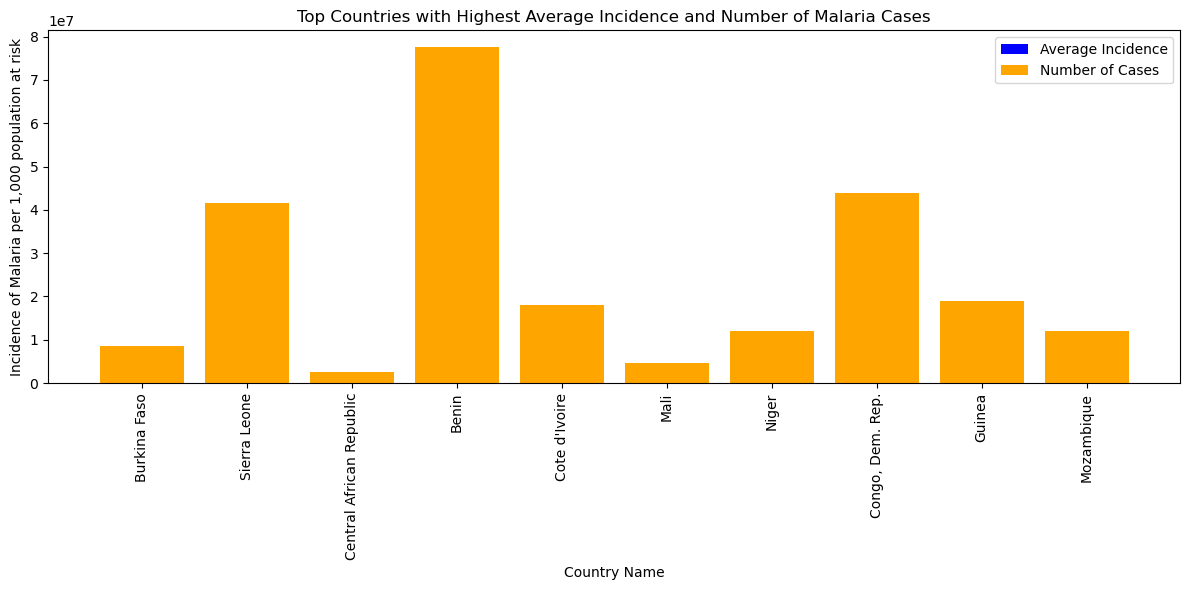

In [19]:
# Group the data by country and calculate the average incidence of malaria cases
average_incidence_by_country = df.groupby("Country Name")["Incidence of malaria (per 1,000 population at risk)"].mean()

# Sort the countries based on the average incidence in descending order
sorted_countries = average_incidence_by_country.sort_values(ascending=False)

# Select the top N countries with the highest average incidence (you can adjust N as needed)
top_countries = sorted_countries.head(10)

# Get the number of malaria cases for the top countries
number_of_cases_by_country = df[df["Country Name"].isin(top_countries.index)]
number_of_cases_by_country = number_of_cases_by_country.groupby("Country Name")["Malaria cases reported"].sum()

# Visualize the top countries with the highest average incidence and their corresponding number of malaria cases
plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries.values, color='blue', label='Average Incidence')
plt.bar(top_countries.index, number_of_cases_by_country.values, color='orange', label='Number of Cases')
plt.xlabel('Country Name')
plt.ylabel('Incidence of Malaria per 1,000 population at risk')
plt.title('Top Countries with Highest Average Incidence and Number of Malaria Cases')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()







In [20]:
# Get the latitude and longitude for each country
country_coordinates = df[df["Country Name"].isin(top_countries.index)][["Country Name", "latitude", "longitude"]]
country_coordinates = country_coordinates.drop_duplicates("Country Name")

# Create the map
map_center = [country_coordinates["latitude"].mean(), country_coordinates["longitude"].mean()]
malaria_map = folium.Map(location=map_center, zoom_start=3)

# Add markers for each country
for index, row in country_coordinates.iterrows():
    country_name = row["Country Name"]
    latitude = row["latitude"]
    longitude = row["longitude"]
    incidence = top_countries[country_name]

    popup_text = f"{country_name}<br>Average Incidence: {incidence:.2f}"
    folium.Marker(location=[latitude, longitude], popup=popup_text).add_to(malaria_map)

# Display the map
malaria_map

The year that heard the highest number of malaria cases reported in urban population

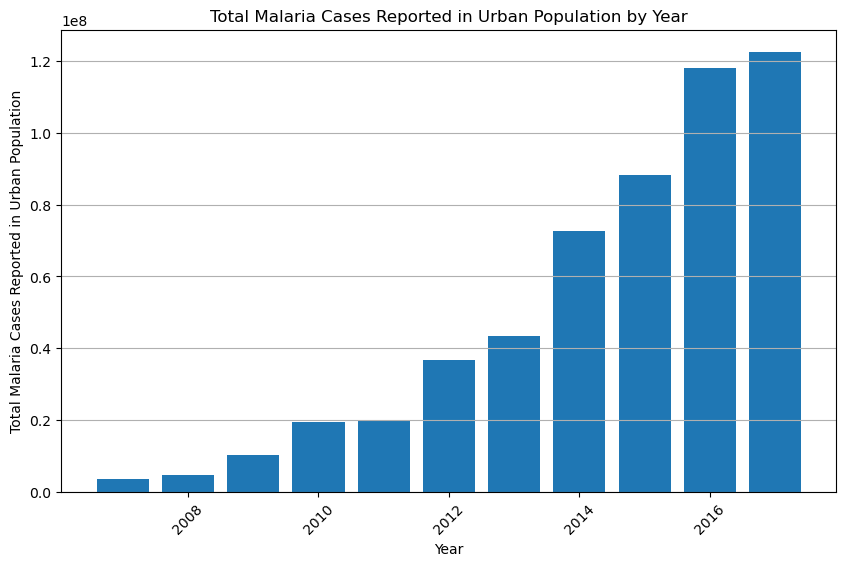

In [22]:
# Filter the data for urban population and malaria cases reported
urban_malaria_cases = df_combined[df_combined["People using safely managed drinking water services, urban (% of urban population)"].notna()]
urban_malaria_cases = urban_malaria_cases[["Year", "Malaria cases reported"]]

# Calculate the total malaria cases reported in the urban population for each year
malaria_cases_by_year = urban_malaria_cases.groupby("Year").sum()

# Create a bar plot to visualize the total malaria cases reported in the urban population for each year
plt.figure(figsize=(10, 6))
plt.bar(malaria_cases_by_year.index, malaria_cases_by_year["Malaria cases reported"])
plt.xlabel("Year")
plt.ylabel("Total Malaria Cases Reported in Urban Population")
plt.title("Total Malaria Cases Reported in Urban Population by Year")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

Heat Map to show the malaria incidence per year

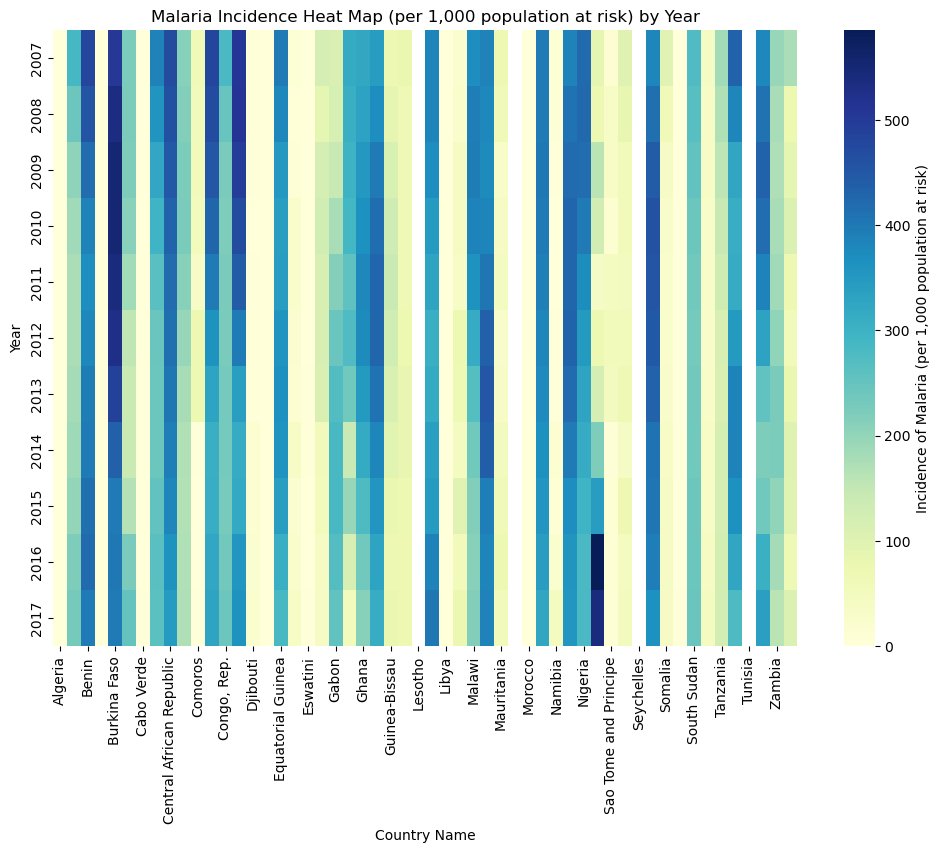

In [23]:

# Filter the data for malaria incidence and year
malaria_incidence = df[["Year", "Country Name", "Incidence of malaria (per 1,000 population at risk)"]]

# Pivot the data to get the Year as the index, Country Name as columns, and Incidence of malaria as values
pivot_table = malaria_incidence.pivot(index="Year", columns="Country Name", values="Incidence of malaria (per 1,000 population at risk)")

# Create a heat map to visualize the malaria incidence for every year
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", cbar_kws={"label": "Incidence of Malaria (per 1,000 population at risk)"})
plt.title("Malaria Incidence Heat Map (per 1,000 population at risk) by Year")
plt.xlabel("Country Name")
plt.ylabel("Year")
plt.show()